An essential part of any image feature extraction procedure is **Edge Detection**. The process of edge detection is used extensively in modern classical image processing algorithms for extracting the structure of the objects/features depicted in an image. Quantum Image processing being an emerging field, is very intriguing and enables one to have exponential speedup (as mentioned in their paper by Ruan et al. [6]), in certain cases over classical image processing. Although, edge detection is fairly efficient in classical image processing, it becomes very slow for larger images due to the huge resolution of these images and the pixel-wise computation that is necessary for most of the classical edge detection algorithms.

On the other hand, the previous application shows how one can convert classical images to quantum images using the Quantum Image Representations (QImRs) like Flexible Representation of Quantum Images (FRQI) [1] and Novel Enhanced Quantum Representation (NEQR) [2] techniques. This section discusses about the Quantum Probability Image Encoding (QPIE) [3] representation and also talks about extending the usage of these QImRs to perform edge detection using the Quantum Hadamard Edge Detection (QHED) algorithm [3].

# Quantum Probability Image Encoding (QPIE)

The QPIE representation uses the probability amplitudes of a quantum state to store the pixel values of a classical image. If we have $n$ -qubits, we have access to up to $2^n$ -states in superposition. In QPIE we take advantage of this fact to design an efficient and robust encoding scheme for Black-and-White (B&W) or RGB images and exponentially reduce the memory required to store the data. That means, for storing a 4-pixel image, we need just 2-qubits; for 8-pixel image we need 3-qubits, and so on. In general, the number of qubits $(n)$ for a $N$-pixel image is calculated as:-

$$
n = \lceil \log_2N \rceil
\label{eq:Num_qubits} \tag{1.1}
$$

## Classical image to QPIE state
Let us take a sample image with four pixels which is arranged in 2D as follows:-

<img src='./images/classical_repr.png' align='center' width='200px'>

Here, the vector $(I_0, I_1, I_2, I_3)$ (or $(I_{00}, I_{01}, I_{01}, I_{11})$ in binary representation of sub-script indices) represents color intensities (in 8-bit B&W color) of different pixels $(00, 01, 10, 11)$ represented as a 2D matrix to form a $2 \times 2$ classical image. The image can be represented in terms of it's pixel intensities as follows:

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
I = (I_{yx})_{N_1 \times N_2}
\label{eq:Classical_Img} \tag{1.2}
$$

Therefore, $\eqref{eq:Classical_Img}$ represent a 2-dimensional image made of $N_1 \times N_2$ pixels, where $I_{yx}$ is the intensity of the pixel at the position $(x, y)$ in the 2D image starting the coordinate axes from the top-left corner of the image.

Now, we need to represent these pixel intensities as the probability amplitudes of a particular quantum state. To do this, the pixel intensities should be normalized so that the sum of the squares of all the probability amplitudes is 1. For every $c_i$ corresponding to respective $I_{yx}$, the normalization can be done as follows:-

$$
c_i = \frac{I_{yx}}{\sqrt{\sum I_{yx} ^2}}
\label{eq:QPIE_normalize} \tag{1.3}
$$

After aforementioned normalization, the quantum-image looks like,

<img src='./images/QPIE_repr.png' align='center' width='200px'>

Finally, assigning the normalized pixel color values of each pixel $P_i$ to the respective quantum state $\ket{i}$, we can write the image state $\ket{\text{Img}}$ as:-

$$
\ket{\text{Img}} = c_0 \ket{00} + c_1 \ket{01} + c_2 \ket{10} + c_3 \ket{11}
\label{eq:QPIE_Img} \tag{1.4}
$$

OR generalizing for $n$-qubits, we have,

$$
\ket{\text{Img}} = \sum _{i=0} ^{2^n-1} c_i \ket{i}
\label{eq:QPIE_Img_sum} \tag{1.5}
$$

Such a state can be very efficiently prepared just by using a few rotation and CNOT gates as can be seen in [7, 8]. A sample circuit for the above 4-pixel image example with B&W pixel values $(0, 128, 192, 255)$ is as follows:-

<img src='./images/state_prep.png' align='center' width='400px'>

# Quantum Hadamard Edge Detection (QHED)

In general, classical edge detection algorithms rely mostly on the computation of image gradients i.e. identifying locations in the image for dark-to-light (or light-to-dark) intensity transitions. Hence, the worst case time complexity for most of them is $O(2^n)$. This means that each pixel needs to be processed individually to determine the gradients.

On the contrary, quantum edge detection algorithms like QSobel [4] provide exponential speedup compared to the existing classical edge detection algorithms. However, there are some steps involved in the algorithm that make it quite inefficient, for example the COPY operation and a quantum black box to calculate the gradients of all the pixels. For both the operations, there is no single efficient implementation that is known as of now and is a complex topic of research. Hence, the need for a much more efficient algorithm is fulfilled by the Quantum Hadamard Edge Detection (QHED) algorithm [3].

## The case of the Hadamard gate
The Hadamard gate $H$ has the following operation on the state of qubit,
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
|0 \rangle \rightarrow \frac{(|0 \rangle + |1 \rangle)}{\sqrt{2}} \\
|1 \rangle \rightarrow \frac{(|0 \rangle - |1 \rangle)}{\sqrt{2}}
\label{eq:had_action} \tag{2.1}
$$

The QHED algorithm generalizes this action of $H$-gate and uses it for edge detection of an image.

Let us assume we have an $N$-pixel image. The pixels of the image can be numbered using binary bit-strings in the form of $\ket{b_{n-1} b_{n-2} b_{n-3} ... b_1 b_0}$ where $b_i \ \in \ \{0, 1\}$.

For two neighboring pixels, the bit-strings can be written as $\ket{b_{n-1} b_{n-2} ... b_1 0}$ and $\ket{b_{n-1} b_{n-2} ... b_1 1}$, i.e. only the least significant bit (LSB) is different for both of them. The corresponding pixel intensity values (normalized) can be written as $c_{b_{n-1} b_{n-2}... b_1 0}$ and $c_{b_{n-1} b_{n-2}... b_1 1}$ respectively. To simplify the notation, we will resort to the decimal representation of the bit-strings. Hence, the pixel values can be written as $c_i$ and $c_{i+1}$ in decimal representation.

Now, if we apply the $H$-gate to the LSB of an arbitrary size quantum register, we can represent the resultant unitary like,

$$
I_{2^{n-1}} \otimes H_0 = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 & 0 & 0 & \dots & 0 & 0 \\
1 & -1 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & 1 & \dots & 0 & 0 \\
0 & 0 & 1 & -1 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 1 & 1 \\
0 & 0 & 0 & 0 & \dots & 1 & -1 \\
\end{bmatrix}
\label{eq:had_on_lsb} \tag{2.2}
$$

Applying this unitary to a quantum register containing pixel values encoded using the QPIE representation $\ket{\text{Img}} = \sum_{i=0} ^{N-1} c_i \ket{i}$, as shown in $eq. (1.1)$, we have,

$$
(I_{2^{n-1}} \otimes H_0) \cdot
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
c_3 \\
\vdots \\
c_{N-2} \\
c_{N-1} \\
\end{bmatrix}
\rightarrow \frac{1}{\sqrt{2}}
\begin{bmatrix}
c_0 + c_1 \\
c_0 - c_1 \\
c_2 + c_3 \\
c_2 - c_3 \\
\vdots \\
c_{N-2} + c_{N-1} \\
c_{N-2} - c_{N-1} \\
\end{bmatrix}
\label{eq:interference} \tag{2.3}
$$

From the above resultant matrix $\eqref{eq:interference}$, it is clearly visible that we now have access to the gradient between the pixel intensities of neighboring pixels in the form of $(c_i - c_{i+1})$  where, $i$ is *even*. Measuring the circuit conditioned on the LSB being in state $\ket{1}$, we can obtain the gradients through statistical analysis.

This process results in the detection of horizontal boundaries between the even-pixels-pairs ($0$ & $1$, $2$ & $3$, and so on). For detecting horizontal boundaries between odd-pixel-pairs ($1$ & $2$, $3$ & $4$, etc.), we can perform an amplitude permutation on the quantum register to convert the amplitude vector $(c_0, c_1, c_2, \dots, c_{N-1})^T$ to $(c_1, c_2, c_3, \dots, c_{N-1}, c_0)^T$, and then applying the $H$-gate and measuring the quantum register conditioned on LSB being $\ket{1}$.

However, we can make it more resource-efficient by using an additional auxiliary qubit!

## A Variation of QHED (with an auxiliary qubit)
As discussed in the previous sub-section, we still have a quantum register with $n$-qubits $(n = \lceil \log_2N \rceil)$ for encoding the $N$-pixel image. However, in this case, we add an extra auxiliary qubit to the register which we can utilize to extend the QHED algorithm and perform computation on both even- and odd-pixel-pairs simultaneously.

Like the last time, we initialize to the state $\ket{Img} = (c_0, c_1, c_2, \dots, c_{N-2}, c_{N-1})^T$. However, the $H$-gate is now applied to the **auxiliary qubit** this time which is initialized to state $\ket{0}$.

This produces an $(n+1)$-qubit redundant image state which can be represented as,

$$
\ket{\text{Img}} \otimes \frac{(\ket{0} + \ket{1})}{\sqrt{2}} = \frac{1}{\sqrt{2}}
\begin{bmatrix}
c_0 \\
c_0 \\
c_1 \\
c_1 \\
c_2 \\
c_2 \\
\vdots \\
c_{N-2} \\
c_{N-2} \\
c_{N-1} \\
c_{N-1} \\
\end{bmatrix}
\label{eq:hadamard_on_auxiliary} \tag{2.4}
$$

Now, since we get the redundant probability amplitudes obtained in the resultant state in $\eqref{eq:hadamard_on_auxiliary}$, we can define an amplitude permutation unitary as follows to transform the amplitudes into a structure which will make it easier to calculate the image gradients further ahead,

$$
D_{2^{n+1}} =
\begin{bmatrix}
0 & 1 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 & \dots & 0 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \dots & 0 & 1 \\
1 & 0 & 0 & 0 & \dots & 0 & 0 \\
\end{bmatrix}
\label{eq:amp_perm_unitary} \tag{2.5}
$$

The above unitary corresponds to a **Decrement gate**. Hence, we can efficeintly decompose this unitary into a set of single- and multi-controlled-X rotations on a register of multiple qubits as shown by Fijany and Williams in [9] and Gidney in [10].

Applying the above decrement gate unitary $D_{2^{n+1}}$ to the redundant image state, we can transform the state $(c_0, c_0, c_1, c_1, c_2, c_2, \dots, c_{N-2}, c_{N-2}, c_{N-1}, c_{N-1})^T$ to the new redundant image state $(c_0, c_1, c_1, c_2, c_2, c_3, \dots, c_{N-2}, c_{N-1}, c_{N-1}, c_0)^T$.

Now again if we apply the $H$-gate to the auxiliary qubit, we obtain the gradients for both even- and odd-pixel-pairs at the same time like so,

$$
(I_{2^{n}} \otimes H) \cdot
\begin{bmatrix}
c_0 \\
c_1 \\
c_1 \\
c_2 \\
c_2 \\
c_3 \\
\vdots \\
c_{N-2} \\
c_{N-1} \\
c_{N-1} \\
c_0 \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
c_0 + c_1 \\
c_0 - c_1 \\
c_1 + c_2 \\
c_1 - c_2 \\
c_2 + c_3 \\
c_2 - c_3 \\
\vdots \\
c_{N-2} + c_{N-1} \\
c_{N-2} - c_{N-1} \\
c_{N-1} + c_0 \\
c_{N-1} - c_0 \\
\end{bmatrix}
\label{eq:had_after_perm} \tag{2.6}
$$

Finally, measuring this state conditioned on the auxiliary qubit being in state $\ket{1}$, we will get the resultant horizontal gradient values $(c_i - c_{i+1})$ for all possible pairs of adjacent qubits.

**NOTE:** The above process provides a horizontal scan of the entire image which has edges detected in only the horizontal direction. To obtain the vertical scan edge detected image, we take the traspose of the image matrix and follow the same process again to obtain a vertical scan. These horizontal and vertical scans are then superimposed on each other using some classical post-processing to create the full edge detected image.

## Quantum Circuit
Let us take a sample $4 \times 4$ image, flattened and represented as the vector: $(0, 0.9, 0, 0, 0.5, 0.6, 0.3, 0, 0, 0.2, 0.7, 0.8, 0, 0, 1, 0)$,

<img src='./images/sample_image_QHED.png' align='center'>

The QHED quantum circuit for the above image can be generalized as:

<img src='./images/sample_image_circuit.png' align='center' width='500px'>

**NOTE:** The measurements of data qubits ($qr1_1$, $qr1_2$, $qr1_3$, and $qr1_4$) is dependent on the measurement outcome of auxiliary qubit ($qr1_0$) being in the state $\ket{1}$

## Time and Space Complexity analysis of QHED

We briefly discussed about the time complexity of classical edge detection algorithms and realised that it is on the order of $O(2^n)$ for the worst case of the algorithm and $O(mn \cdot \log(mn))$ for some of the more improved classical edge detection techniques [11].

On the other hand, when one comes to the quantum edge detection techniques, the QSobel algorithm is much faster at $O(n^2)$,and uses the FRQI image representation for encoding an $(N \times N)$ -pixel image ($N = 2^n$, in a $n$ -qubit system) [4]. However, the FRQI image representation has a complex state preparation process ($[O(n) + O(\log^2 n)]$ circuit depth in the worst case) and requires more qubits ( $[1+2N]$ -qubits) to store the image data [1], which is a limited resource in today's  hardware. Moreover, QSobel also suffers from problems with efficient implementation of certain intermediate sub-routines (like COPY and black-box function for gradient calculation) within the algorithm [3].

The QHED algorithm which is used here, has more space-efficient image encoding scheme (QPIE) which uses amplitude encoding leading to an exponential decrease in the number of qubits used (just $(n = \lceil \log_2N \rceil)$ -qubits). However, the time complexity of state-preparation step for image encoding using QPIE is slightly higher at $O[n^2]$ [12], than FRQI. Also, the most efficient implementation of the decrement gate has the circuit depth of $O[\text{poly}(n)]$. But, since QHED smartly utilizes the property of the Hadamard-gate, we are able to achieve a time complexity of $O(1)$ for the edge detection procedure (without including state-preparation and amplitude permutation). This is much lower than the $O(n^2)$ complexity required for the QSobel algorithm. Hence, the QHED algorithm gives us a superexponential speedup over classical algorithms and polynomial speedup over the QSobel algorithm.

**NOTE:** Another aspect that we would need to focus on for making this quantum algorithm work is the number of measurements that one needs to make to get considerable accuracy for the algorithm. Generally, for a $n$ -qubit circuit, one requires $O(2^n)$ measurements to get good precision for the output probabilities. However, if the goal is just to discover some specific patterns in the image, we can perform measurement of a single local observable with the number of measurements just on the order of $O(n^2)$ [3]. However, this limitation is not of the algorithm, but a characteristic of the inherent quantum nature of the system on which the algorithm is run, and hence the quantum and classical edge detection algorithms are not directly comparable only on the basis of the time complexity bounds.

# Implementation using Qiskit

## QHED on Small Images

### Running on the Simulator

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

For the purpose of this demonstration, we can assume that an image is nothing but a collection of pixel values represented as a numpy matrix in python. Also, initially let us take only binary values for pixels for simplicity i.e. $I_{jk} \ \in \ \{0, 1\}$, and there are no floating point values for pixel intensities.

Later we'll see that the same algorithm can also be used with proper 8-bit B&W images.

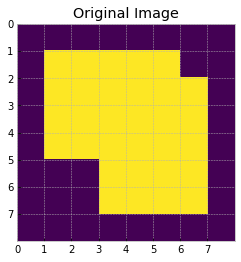

In [2]:
# A 8x8 binary image represented as a numpy array
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
plot_image(image, 'Original Image')

Now that we have defined our image for testing, we can go ahead and use $eq. (1.3)$ to encode the pixel intensities as probability amplitudes of different states of the system:-

In [3]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)

As can be seen in the above python code, we obtain two different aplitude encoded quantum images. The first one (`image_norm_h`) is for the horizontal scanning of the image and the second one (`image_norm_v`) is for the vertical scanning of the image.

After this we initialize the number of qubits and the amplitude permutation unitary like so,

In [4]:
# Initialize some global variable for number of qubits
data_qb = 6
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

Once, we have normalized the pixel values, converted them to probability amplitudes, anc determined the number of qubits necessary for processing the image, we can start making the quantum circuit for the same.

Since, our image now basically represents the amplitudes of different quantum states, we can directly use the `initialize()` method to perform the state preparation. After this, we add a Hadamard gate to the auxiliary qubit, then the amplitude permutation unitary, and then again a Hadamard gate to auxiliary qubit. Also, the whole circuit is repeated once more for the vertical scanning of image.

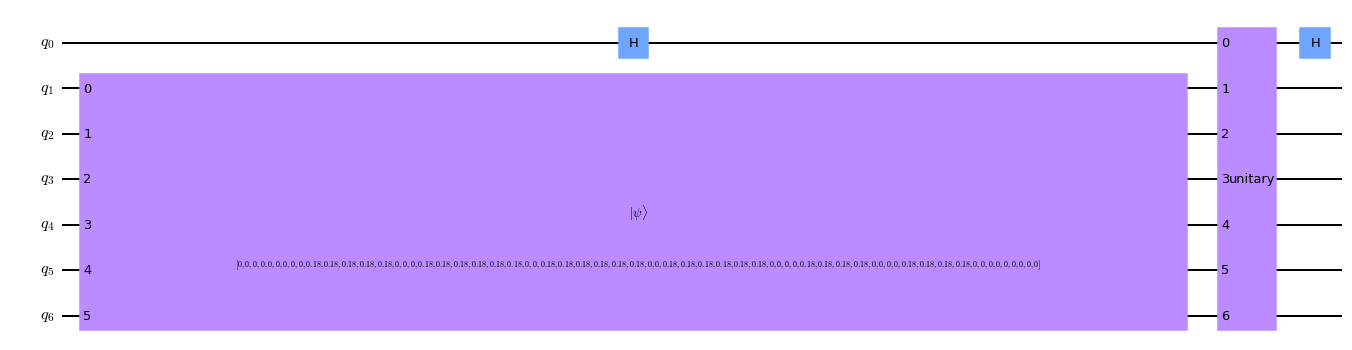

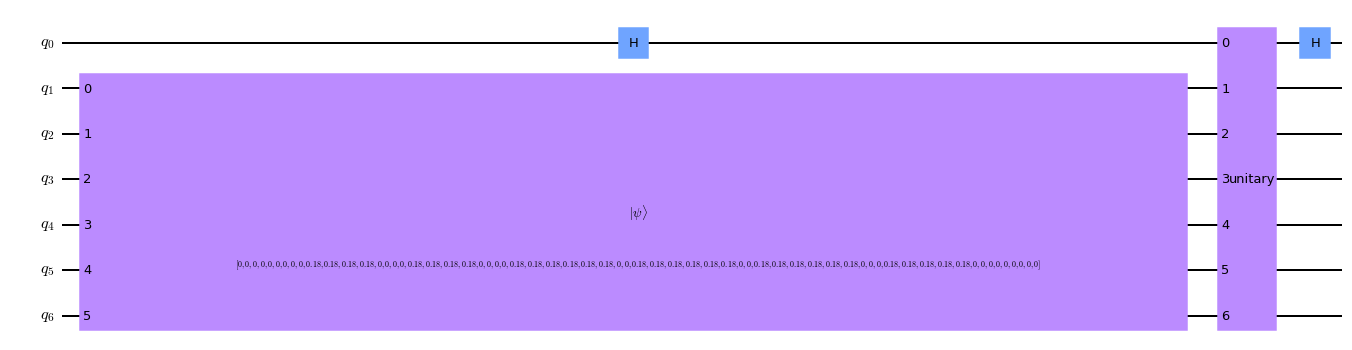

In [5]:
# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
display(qc_v.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

Now, we simulate the circuits using the `statevector_simulator` and obtain the statevector of the system as the output.

In [6]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(circ_list, backend=back).result()
sv_h = results.get_statevector(qc_h)
sv_v = results.get_statevector(qc_v)

from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
display(array_to_latex(sv_h[:30], max_size=30))
print()
print('Vertical scan statevector:')
display(array_to_latex(sv_v[:30], max_size=30))

Horizontal scan statevector:


<IPython.core.display.Latex object>


Vertical scan statevector:


<IPython.core.display.Latex object>

From $eq. (2.6)$, we can clearly see that we need to consider only those states where the auxiliary qubit (qubit-0 or LSB in our case) gives a measurement output of $\ket{1}$. Since, we know that LSB is 1 in a bit-string only for odd numbers, we easily just take the amplitudes corresponding to odd states from the statevector to form our image and discard all the even states.

The following code, performs this task along with some classical post-processing to ensure that we get the best results when we plot our image. After we filter the required states from the raw statevector, we can rearrange the 1D array of amplitudes to a 2D matrix to get our edge detected horizontal and vertical scans like so,

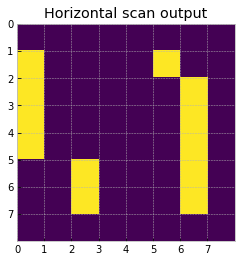

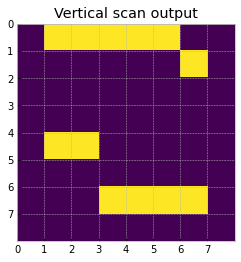

In [7]:
# Classical postprocessing for plotting the output

# Defining a lambda function for
# thresholding to binary values
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(8, 8)
edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(8, 8).T

# Plotting the Horizontal and vertical scans
plot_image(edge_scan_h, 'Horizontal scan output')
plot_image(edge_scan_v, 'Vertical scan output')

Finally, we combine both horizontal and vertical scans to get the complete edge detected image as shown below,

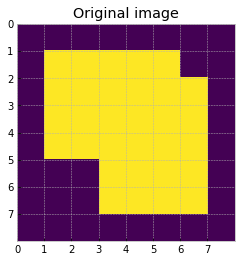

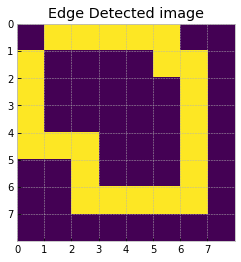

In [8]:
# Combining the horizontal and vertical component of the result
edge_scan_sim = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected image')

### Running on Real Hardware
This section takes a part of the previously simulated image (represented by the `qc_h` and `qc_v`) and runs them on the `ibmq_santiago` backend to test the running the algorithm on a real quantum computer with inherent noise and error characteristics specific to the hardware.

First we import and load our IBMQ account and select the `ibmq_santiago` backend.

In [9]:
from qiskit import IBMQ

# Load the IBMQ account
IBMQ.load_account()

# Get the provider and backend
provider = IBMQ.get_provider(hub='ibm-q', group='open')
backend = provider.get_backend('ibmq_santiago')

Since, running on actual hardware deals with encountering errors due to noise, we only limit this example to run on (2+1)-qubits as of now. For the demonstration, now we can crop a part of the the above image that was used in the simulation,

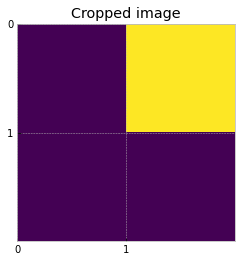

In [10]:
# Create a 2x2 image to be run on the hardware
# The pixels in `image_small` correspond to the pixels at
# (6, 2), (6, 3), (7, 2), (7, 3) respectively
image_small = image[6:8, 2:4]

# Plotting the image_small using matplotlib
plot_image(image_small, 'Cropped image')

Defining the parameters for the quantum circuit of the QHED algorithm and creating instances of horizontal and vertical scan circuits.

For the Horizontal and Vertical scan of the above image, we can see that the operations for state-preparation and decrement gate be written as follows:-

<br>

**Horisontal Scan:**
1. State preparation ($|\text{Img}\rangle = |01\rangle$) : We can ahieve this with a simple $[ X(1) ]$ operation.
2. Decrement gate: We can achieve this by a sequence of $[X(0), CX(0, 1), CCX(0, 1, 2)]$ operations.

<br>

**Vertical Scan:**
1. State preparation ($|\text{Img}\rangle = |10\rangle$) : We can ahieve this with a simple $[ X(2) ]$ operation.
2. Decrement gate: We can achieve this by a sequence of $[X(0), CX(0, 1), CCX(0, 1, 2)]$ operations.

In [11]:
# Initialize the number of qubits
data_qb = 2
anc_qb = 1
total_qb = data_qb + anc_qb

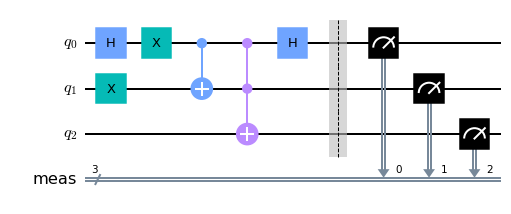

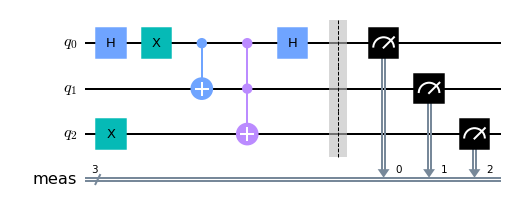

In [12]:
# Create the circuit for horizontal scan
qc_small_h = QuantumCircuit(total_qb)
qc_small_h.x(1)
qc_small_h.h(0)

# Decrement gate - START
qc_small_h.x(0)
qc_small_h.cx(0, 1)
qc_small_h.ccx(0, 1, 2)
# Decrement gate - END

qc_small_h.h(0)
qc_small_h.measure_all()
display(qc_small_h.draw('mpl'))

# Create the circuit for vertical scan
qc_small_v = QuantumCircuit(total_qb)
qc_small_v.x(2)
qc_small_v.h(0)

# Decrement gate - START
qc_small_v.x(0)
qc_small_v.cx(0, 1)
qc_small_v.ccx(0, 1, 2)
# Decrement gate - END

qc_small_v.h(0)
qc_small_v.measure_all()
display(qc_small_v.draw('mpl'))

# Combine both circuits into a single list
circ_list = [qc_small_h, qc_small_v]

For running the circuit on real hardware, it is necessary to decompose the above quantum circuit into the basis gates $(X, SX, RZ(\theta), CX)$ for the `ibmq_santiago` backend in order to run the circuit properly. To achieve this, we transpile the above circuit according to our backend's coupling map and also set the `optimization_level=3`, to get the most most optimized circuit according to the hardware.

In [16]:
# Transpile the circuits for optimized execution on the backend
qc_small_h_t = transpile(qc_small_h, backend=backend, optimization_level=3)
qc_small_v_t = transpile(qc_small_v, backend=backend, optimization_level=3)

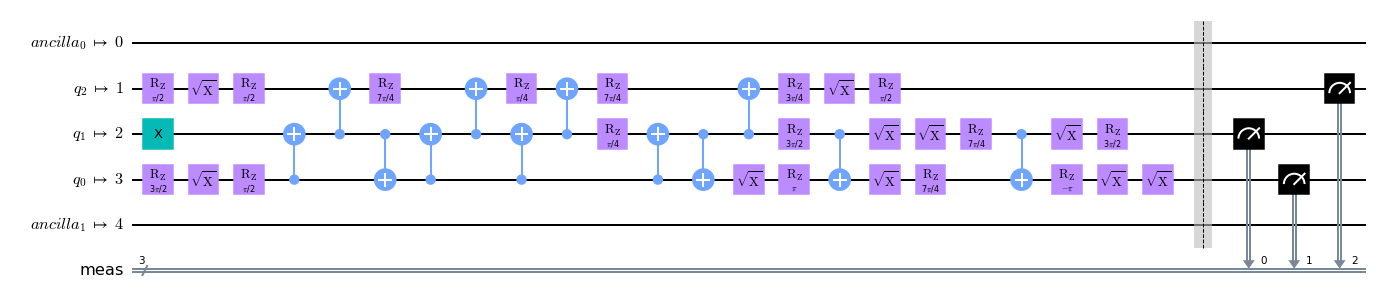

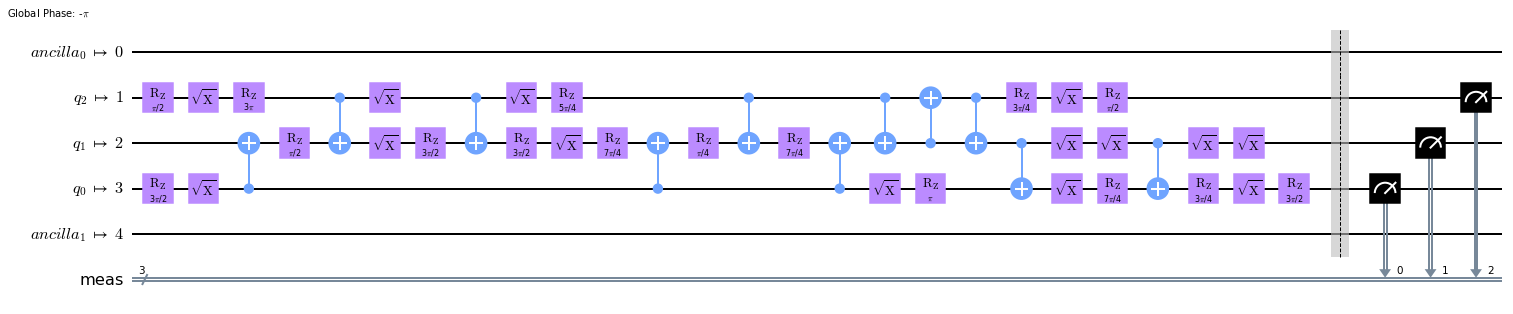

In [30]:
# Combining both circuits into a list
circ_list_t = [qc_small_h_t, qc_small_v_t]

# Drawing the transpiled circuit
display(circ_list_t[0].draw('mpl', fold=-1))
display(circ_list_t[1].draw('mpl', fold=-1))

Finally, we run the circuits on our backend and obtain the results shown in the histograms below,

In [27]:
from qiskit.tools.monitor import job_monitor

# Executing the circuits on the backend
job = execute(circ_list_t, backend=backend, shots=8192)
job_monitor(job)

Job Status: job has successfully run


Counts for Horizontal scan:


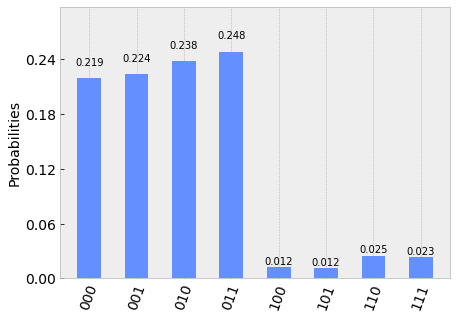



Counts for Vertical scan:


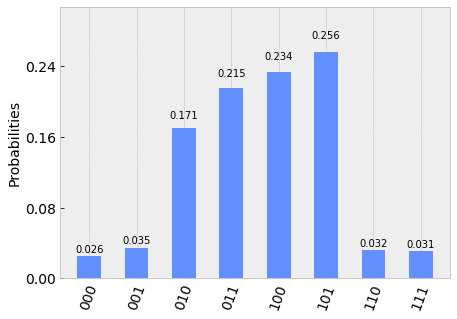

In [28]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_small_h)
counts_v = result.get_counts(qc_small_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

Now, we extract the counts of the odd-numbered states from horizontal and vertical scans because only those states contain the pixel intensity gradient information in which the auxiliary qubit is in the state $|1 \rangle$.

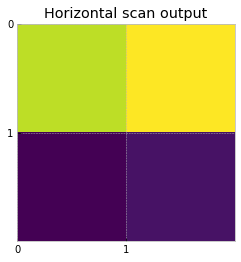

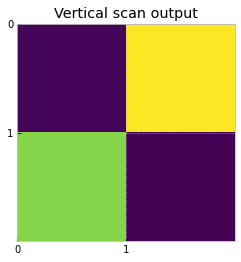

In [31]:
# Extracting counts for odd-numbered states
edge_scan_small_h = np.array([counts_h[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

Finally, we combine both horizontal and vertical scans to make the full edge detection cropped image as shown below,

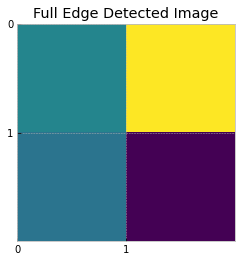

In [32]:
edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

For comparison, let's simulate the quantum circuits on the `qasm_simulator` as well and check how the probability distribution obtained from the real hardware, differs from a perfect simulation:-

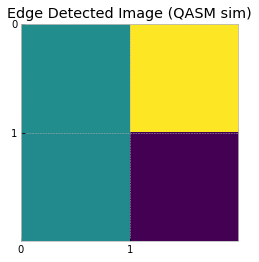

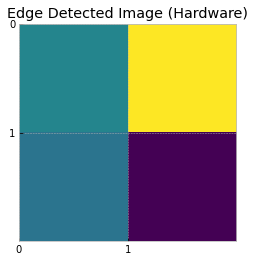

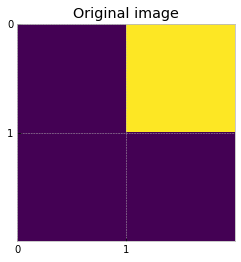

In [33]:
# Initialise the qasm_simulator from the Aer package
sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list_t, shots=8192).result()
sim_counts_h = res.get_counts(qc_small_h)
sim_counts_v = res.get_counts(qc_small_v)

# Get the measurement counts from the result
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

# Filter and extract the counts for odd-numbered states
# and make the full edge-detected image by adding horizontal and vertical scans
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:03b}'] if f'{2*i+1:03b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(2, 2)
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:03b}'] if f'{2*i+1:03b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(2, 2).T
edge_detected_sim_small = edge_scan_sim_h + edge_scan_sim_v

# Plot all the simulator-run, hardware-run, and original images
plot_image(edge_detected_sim_small, 'Edge Detected Image (QASM sim)')
plot_image(edge_detected_image_small, 'Edge Detected Image (Hardware)')
plot_image(image_small, 'Original image')

## QHED on Larger Images (Exercise for the reader!)

As the quantum technology advances, we will see more and more applications related to faster image processing and image manipulation. However, for processing insanely large data like 4K images and videos, one would have to process the image in multiple parts until we reach the stage of fault-tolerant quantum hardware.

This exercise tries to incorporate a similar workflow to perform edge detection for an image which is approximately $1000 \times$ larger than out previous $8 \times 8$ pixel image example. Here, you (the reader) have to load a $256 \times 256$ pixel, 8-bit color, custom image and perform edge detection to it using the QHED algorithm as discussed in the previous examples. This has to be done by diving it into multiple smaller images and then combining them together at the end.

We also define an initial code snippet, which helps you to load the image and also we define a variable `image_crop_size`, which refers to the size of each part that this image will be divided into. Feel free to change the variables below and play around with the values to get the best balance between the size of each part of image and the total number of parts that the original image is divided into. Write your code in the cell which says `## YOUR CODE GOES HERE #####`. We hope you enjoy this exercise! :D

Raw Image info: (256, 256, 3)
Raw Image datatype: uint8
Image shape (numpy array): (256, 256)


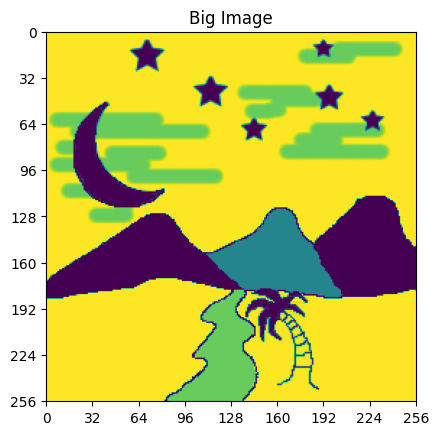

In [34]:
from PIL import Image
style.use('default')

image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_raw = np.array(Image.open('./images/edge_detection_input.jpg'))
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)


# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
image = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)


# Display the image
plt.title('Big Image')
plt.xticks(range(0, image.shape[0]+1, 32))
plt.yticks(range(0, image.shape[1]+1, 32))
plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
plt.show()

In [35]:
## YOUR CODE GOES HERE #####

## YOUR CODE GOES HERE #####

**Hint:** Since, the above image is very big to encode at once on today's devices, the solution to this problem would contain the following steps:
   1. Find the maximum image size which is simulable on the `statevector_simulator` (Try choosing a power of 2). Let us consider it to be $'w'$.
   2. Divide the $256 \times 256$ image into multiple parts of size $w \times w$
   3. Create circuit for each part and measure the edge detected image.
   4. Combine all the parts to get a single edge detected image of size $256 \times 256$.

The final image should like look something like this:

<img src='images/edge_detection_sample_output.png' width='500px' align='center'>

# References 

[1] Le, P.Q., Dong, F. & Hirota, K. A flexible representation of quantum images for polynomial preparation, image compression, and processing operations. Quantum Inf Process 10, 63–84 (2011). https://doi.org/10.1007/s11128-010-0177-y 

[2] Zhang, Y., Lu, K., Gao, Y. et al. _NEQR: a novel enhanced quantum representation of digital images._ Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[3] Yao, Xi-Wei, et al. "Quantum image processing and its application to edge detection: theory and experiment." Physical Review X 7.3 (2017): 031041. https://arxiv.org/abs/1801.01465

[4] Zhang, Yi, Kai Lu, and YingHui Gao. "QSobel: a novel quantum image edge extraction algorithm." Science China Information Sciences 58.1 (2015): 1-13. https://link.springer.com/article/10.1007/s11432-014-5158-9

[5] Yan, Fei, Abdullah M. Iliyasu, and Salvador E. Venegas-Andraca. "A survey of quantum image representations." Quantum Information Processing 15.1 (2016): 1-35. https://link.springer.com/article/10.1007/s11128-015-1195-6

[6] Ruan, Yue, Xiling Xue, and Yuanxia Shen. "Quantum Image Processing: Opportunities and Challenges." Mathematical Problems in Engineering 2021 (2021). https://www.hindawi.com/journals/mpe/2021/6671613/

[7] L. Grover and T. Rudolph, "Creating Superpositions That Correspond to Efficiently Integrable Probability Distributions", https://arxiv.org/abs/quant-ph/0208112

[8] A. N. Soklakov and R. Schack, "Efficient State Preparation for a Register of Quantum Bits", Phys. Rev. A 73, 012307 (2006). https://arxiv.org/abs/quant-ph/0408045

[9] Fijany, Amir, and Colin P. Williams. "Quantum wavelet transforms: Fast algorithms and complete circuits." NASA international conference on quantum computing and quantum communications. Springer, Berlin, Heidelberg, 1998. https://arxiv.org/abs/quant-ph/9809004

[10] Craig Gidney, "Constructing Large Increment Gates". https://algassert.com/circuits/2015/06/12/Constructing-Large-Increment-Gates.html

[11] Katiyar, Sunil Kumar, and P. V. Arun. "Comparative analysis of common edge detection techniques in context of object extraction." arXiv preprint arXiv:1405.6132 (2014). https://arxiv.org/abs/1405.6132

[12] Zhang, Xiao-Ming, Man-Hong Yung, and Xiao Yuan. "Low-depth Quantum State Preparation." arXiv preprint arXiv:2102.07533 (2021). https://arxiv.org/abs/2102.07533

In [36]:
import qiskit.tools.jupyter
%qiskit_version_table